In [1]:
import numpy as np
import pandas as pd

In [5]:
pd.concat([pd.DataFrame(), pd.DataFrame({"hi":[1]})])

,hi
0,1


In [33]:
def run_experiment(experiment):
    dataset, model1, selector1 = experiment
    dataset_name, (X,Y) = dataset
    (model_name, model) = model1
    (selector_name, selector) = selector1
    print('evaluating dataset/model/selector: ',dataset_name,model_name,selector_name,'...')
    print('evaluating dataset/model/selector: ',dataset_name,model_name,selector_name,'...')
    return None

In [220]:
from model_selectors import selectors
from models.sklearn_simple import all_models
from datasets.sklearn_datasets import classification_datasets

In [221]:
import itertools
all_datasets = classification_datasets(downsample_size=10**4)


In [232]:
# List of all experiments
experiments = itertools.product(
                                    all_datasets.items(),
                                    all_models.items(),
                                    selectors.items()
                                    )

In [233]:
type(experiments)

itertools.product

In [ ]:
[x for x in ]

In [224]:
d = {"a":1, "b":2}

In [226]:
did = iter(d)

In [229]:
[x for x in did.items()]

AttributeError: 'dict_keyiterator' object has no attribute 'items'

In [228]:
type(did)

dict_keyiterator

In [223]:
type(experiments)

list

In [34]:
run_experiment(experiments[0])

evaluating dataset/model/selector:  breast_cancer logistic_regression FisherSelector ...
evaluating dataset/model/selector:  breast_cancer logistic_regression FisherSelector ...


In [6]:
import multiprocessing
p = multiprocessing.Pool(2)

Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/rspeare/anaconda/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Users/rspeare/anaconda/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Users/rspeare/anaconda/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rspeare/anaconda/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rspeare/anaconda/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/rspeare/anaconda/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/rspeare/anaconda/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/Users/rspeare/anacond

In [48]:
def f(x,y=0):
    return x+y

In [49]:
from functools import partial

In [52]:
!ls

Testing.ipynb              datasets
Testing_and_Plotting.ipynb model_selectors
__init__.py                models
__pycache__                run.py
active_evaluate.py


In [5]:
import pandas as pd

In [124]:
df = pd.read_csv("../results/all_metrics.csv")

In [125]:
import seaborn as sns

In [126]:
df.head(1)

,Unnamed: 0,accuracy,f1,logloss,n_total_train,seed_initialization_run,test_base_rate,test_positives,test_size,train_base_rate,train_fraction,train_positives,train_size,dataset,model,selector
0,0,0.616,0.530562,0.754885,1000,0,0.526,526,1000,0.333333,0.015,5,15,california_housing,logistic_regression,random


In [127]:
agg = df.groupby(['dataset', 'model', 'selector', 'train_size']).agg({'f1':['mean', 'std']})
agg.columns = ['_'.join(col).strip() for col in agg.columns.values]
agg['f1_upper'] = agg["f1_mean"]+agg['f1_std'].fillna(0)
agg['f1_lower'] = agg["f1_mean"]-agg['f1_std'].fillna(0)
agg = agg.reset_index()
agg.head(1)

,dataset,model,selector,train_size,f1_mean,f1_std,f1_upper,f1_lower
0,boston,logistic_regression,random,15,0.774049,NaN,0.774049,0.774049


In [217]:
df = pd.read_csv('../results/all_metrics.csv')

In [218]:
agg = df.groupby(['dataset', 'model', 'selector', 'train_size']).agg({'f1':['mean', 'std']})

In [219]:
df.loc[(df["dataset"]=='boston') & (df['selector']=='random') & (df['train_size']==15)].head(10)

,Unnamed: 0,accuracy,f1,logloss,n_total_train,seed_initialization_run,test_base_rate,test_positives,test_size,train_base_rate,train_fraction,train_positives,train_size,f1_mean,f1_std,dataset,model,selector
2000,0,0.802372,0.786325,0.677749,506,0,0.494071,250,506,0.600000,0.029644,9,15,0.708428,0.080236,boston,logistic_regression,random
2050,50,0.666008,0.630197,6.153434,506,1,0.494071,250,506,0.533333,0.029644,8,15,0.708428,0.080236,boston,logistic_regression,random
2100,100,0.796443,0.807477,0.711890,506,2,0.494071,250,506,0.666667,0.029644,10,15,0.708428,0.080236,boston,logistic_regression,random
2150,150,0.612648,0.593361,1.558555,506,3,0.494071,250,506,0.466667,0.029644,7,15,0.708428,0.080236,boston,logistic_regression,random
2200,200,0.669960,0.557029,1.487973,506,4,0.494071,250,506,0.333333,0.029644,5,15,0.708428,0.080236,boston,logistic_regression,random
2250,250,0.723320,0.686099,0.980129,506,5,0.494071,250,506,0.466667,0.029644,7,15,0.708428,0.080236,boston,logistic_regression,random
2300,300,0.780632,0.738824,0.898380,506,6,0.494071,250,506,0.466667,0.029644,7,15,0.708428,0.080236,boston,logistic_regression,random
2350,350,0.731225,0.688073,2.722723,506,7,0.494071,250,506,0.266667,0.029644,4,15,0.708428,0.080236,boston,logistic_regression,random
2400,400,0.640316,0.704545,2.054084,506,8,0.494071,250,506,0.533333,0.029644,8,15,0.708428,0.080236,boston,logistic_regression,random
2450,450,0.802372,0.799197,0.921781,506,9,0.494071,250,506,0.533333,0.029644,8,15,0.708428,0.080236,boston,logistic_regression,random


In [185]:
# df.loc[(df["train_size"]==15) & (df["dataset"]=='boston')]

In [186]:
import numpy as np

In [187]:
df["f1_mean"] = df.groupby(['train_size'])['f1'].transform(np.mean)

In [188]:
df['f1'].mean()

0.8221563050912756

<Figure size 576x576 with 0 Axes>

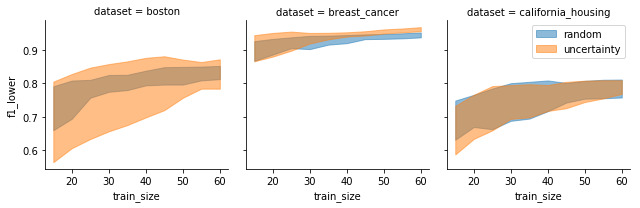

In [189]:
import seaborn as sns
df = df.reset_index()
agg = df.groupby(['dataset', 'model', 'selector', 'train_size']).agg({'f1':['mean', 'std']})
agg.columns = ['_'.join(col).strip() for col in agg.columns.values]
agg['f1_upper'] = agg["f1_mean"]+agg['f1_std']
agg['f1_lower'] = agg["f1_mean"]-agg['f1_std']
agg = agg.reset_index()

plt.figure(figsize=(8,8))
g = sns.FacetGrid(col='dataset', hue='selector', col_wrap=3, data=agg)
g.map(plt.fill_between, 'train_size', 'f1_lower', 'f1_upper', alpha=0.5)
plt.legend(loc='upper right')

In [190]:
# Piecewise plots
df = df.set_index(['dataset','model','selector'])
dataset_model_confs = list(set((conf[:2] for conf in df.index)))

In [197]:
v = np.array([1,0,0,0,1])

In [206]:
import random

In [216]:
list(np.where(v)[0][-1:])

[4]

In [191]:
dataset_model_confs

[('boston', 'logistic_regression'),
 ('california_housing', 'logistic_regression'),
 ('breast_cancer', 'logistic_regression')]

In [192]:
selector_names

['random', 'uncertainty']

('boston', 'logistic_regression')
('california_housing', 'logistic_regression')
('breast_cancer', 'logistic_regression')


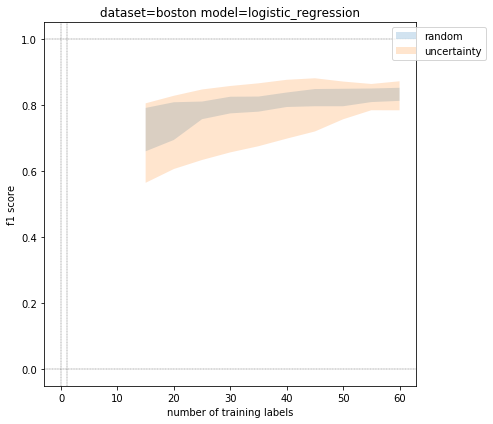

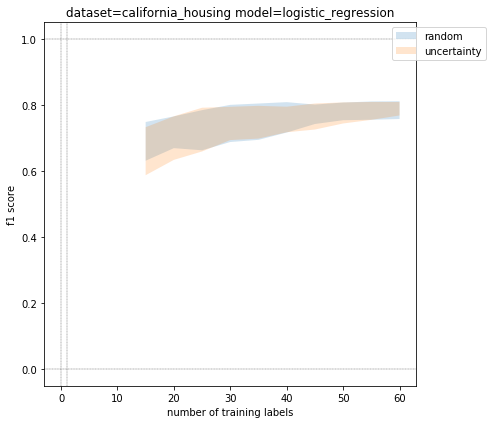

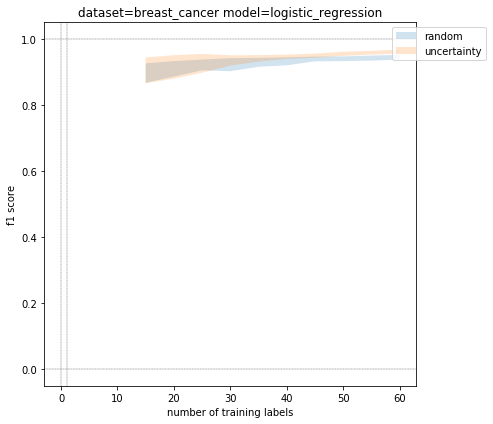

In [195]:
for ix in dataset_model_confs:
    dataset_name, model_name = ix
    print(ix)
    df_selectors = df.loc[ix]
    selector_names = list(set(df_selectors.index))
    plt.figure(figsize=(7, 6))
    plt.title('dataset=%s model=%s' % (dataset_name, model_name))
    plt.xlabel('number of training labels')
    plt.ylabel('f1 score')
    #     plt.xlim([-0.1, 1.1])
    #     plt.ylim([-0.1, 1.1])
    ax_line_args = {'color': 'black', 'linewidth': 0.3, 'linestyle': 'dashed'}
    plt.axvline(x=0.0, **ax_line_args)
    plt.axvline(x=1.0, **ax_line_args)
    plt.axhline(y=0.0, **ax_line_args)
    plt.axhline(y=1.0, **ax_line_args)

    for selector_name in selector_names:
        df_experiment = df_selectors.loc[selector_name]
        agg = df_experiment.groupby(['train_size']).agg({'f1': ['mean', 'std']})
        agg.columns = ['_'.join(col).strip() for col in agg.columns.values]
        agg = agg.reset_index()
        agg['f1_upper'] = agg["f1_mean"] + agg['f1_std'].fillna(0)
        agg['f1_lower'] = agg["f1_mean"] - agg['f1_std'].fillna(0)
        plt.fill_between(agg['train_size'], agg['f1_lower'], y2=agg["f1_upper"], alpha=0.2, label=selector_name)#, alpha=0.1)

    ax = plt.gca()
    leg = plt.legend(loc='upper right')
    bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
    # Change to location of the legend.
    xOffset = 0.2
    bb.x0 += xOffset
    bb.x1 += xOffset
    leg.set_bbox_to_anchor(bb, transform=ax.transAxes)
    fig_path = 'plots/%s-%s.png' % (dataset_name, model_name)
    plt.tight_layout()

<Figure size 576x576 with 0 Axes>

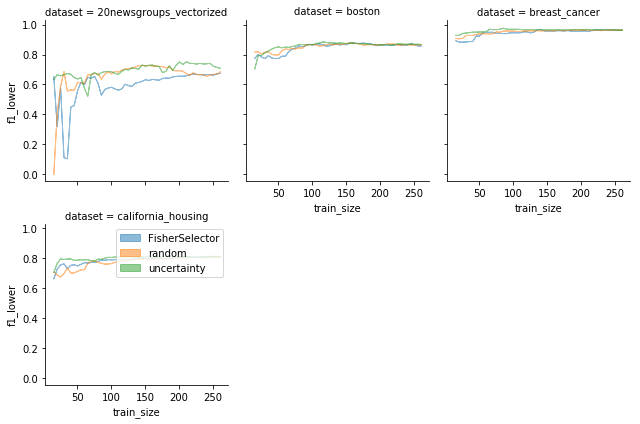

In [67]:
plt.figure(figsize=(8,8))
g = sns.FacetGrid(col='dataset', hue='selector', col_wrap=3, data=agg)
g.map(plt.fill_between, 'train_size', 'f1_lower', 'f1_upper', alpha=0.5)
plt.legend()
plt.savefig('../results/plots/overall_plot.png')

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
g.map(plt.plot, 'train_size', 'f1')

NameError: name 'g' is not defined

In [16]:
sns.lineplot(x='train_size', y='f1', data=df.head(100))

AttributeError: 'NoneType' object has no attribute 'ndim'

In [14]:
df.groupby(['dataset', 'model', 'selector', 'train_size']).agg({'f1':['mean', 'std']})["f1"]["mean"]

dataset                  model                selector        train_size
20newsgroups_vectorized  logistic_regression  FisherSelector  15            0.656392
                                                              20            0.321590
                                                              25            0.580864
                                                              30            0.114671
                                                              35            0.106264
                                                              40            0.452198
                                                              45            0.462309
                                                              50            0.562606
                                                              55            0.618008
                                                              60            0.601011
                                                              65            0

In [1]:
import seaborn as sns

In [ ]:
sns.l

In [50]:
g=partial(f, y=1)

In [51]:
g(1)

2

In [35]:
p.map(lambda x: f(x), [x for x in range(10)])

PicklingError: Can't pickle <function <lambda> at 0x1a1bf8dd08>: attribute lookup <lambda> on __main__ failed

In [8]:
from model_selectors.fisher import ActiveLearningLogisticRegression

In [9]:
import active_evaluate

In [10]:
from active_evaluate import active_evaluate
from model_selectors import selectors
from models.sklearn_simple import all_models
from datasets.sklearn_datasets import classification_datasets
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import os

labels_per_epoch = 10

all_datasets = classification_datasets()

#(dataset,model,selector)
experiments = list(itertools.product(
                                    all_datasets.items(),
                                    all_models.items(),
                                    selectors.items()
                                    ))

In [11]:
X, Y = all_datasets['20newsgroups_vectorized']

In [12]:
selector = selectors["fisher_info"]

In [13]:
model = all_models['logistic_regression']#.keys()

In [14]:
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
model.decision_function(X[:2])

array([-0.26346046,  0.31006817])

In [19]:
logit(model.predict_proba(X[:2])[:, 1])

array([-0.26346046,  0.31006817])

In [30]:
def active_evaluate(X, Y, model, selector, epochs, labels_per_epoch,test_size=0.1, bootstrap_size=10):
    """

    :param X:
    :param Y:
    :param model:
    :param selector:
    :param epochs:
    :param labels_per_epoch:
    :param test_size:
    :return:
    """
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)
    selected_ixs = random.sample(set(np.arange(X_train.shape[0])), bootstrap_size) # ordered list of indices we've asked for human labels so far
    model.fit(X_train[selected_ixs], Y_train[selected_ixs])
    metrics_by_epoch = []
    for epoch in range(epochs):
        if epochs <= 20 or epoch % (epochs//20) == 0:
            print('%d/%d epochs...'%(epoch, epochs))
        next_ixs = selector.next_indices(X_train, selected_ixs, Y_train[selected_ixs], model,
                                         n_ixs=labels_per_epoch)
        assert len(set(next_ixs)&set(selected_ixs)) == 0 #must be new indices
        selected_ixs += next_ixs
        # TODO allow for importance weights in model
        model.fit(X_train[selected_ixs], Y_train[selected_ixs])
        P = model.predict_proba(X_test)
        metrics = binary_class_metrics(Y_train[selected_ixs],Y_test,P,len(Y_train))
        metrics_by_epoch.append(metrics)
    return metrics_by_epoch

In [2]:
import sys,os
import numpy as np
import json
import random
import time
from collections import Counter
from sklearn.metrics import average_precision_score, accuracy_score, f1_score, log_loss
from sklearn.cross_validation import train_test_split


/Users/rspeare/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from scipy.special import logit

In [ ]:
model.co

In [6]:
logit(.5)

0.0

In [ ]:
res = active_evaluate(X,Y, model, selector, 1, 1)

0/1 epochs...


In [ ]:
all_metrics = []
for (dataset_name,(X,Y)),(model_name, model),(selector_name, selector) in experiments:
    print('evaluating dataset/model/selector: ',dataset_name,model_name,selector_name,'...')
    #TODO don't hardcode epochs and number of examples per epoch
    epochs = len(Y)//labels_per_epoch
    metrics_by_epoch = active_evaluate(X, Y, model, selector, epochs, labels_per_epoch)
    for metric in metrics_by_epoch:
        metric['dataset'] = dataset_name
        metric['model'] = model_name
        metric['selector'] = selector_name
        all_metrics.append(metric)